# Theis well function

The transient drawdown to a well in an aquifer of infinite extent and constant transmissivity is given by Theis

$$ s = \frac {Q} {4 \pi kD} W\left( u \right) $$
with
$$ u = \frac {r^2 S} {4 kD t} $$

Where $W(u)$ is know as Theis' well function, which is mathematically known as the exponential integral, which is known to Python as exp1
present in module scipy.special.

$$ W(u) = exp1(u) = \intop_u^{\infty} \frac {e^{-y}} {y}  dy $$

The graph of W(u) versus 1/u both on logarithmic scale is called the "Theis type curve". We'll show it below.

In [13]:
# First import the required functionality

import numpy as np                  # numerical stuff
import matplotlib.pyplot as plt     # plotting and visualization stuff
import scipy.special as sp          # mathematical functions

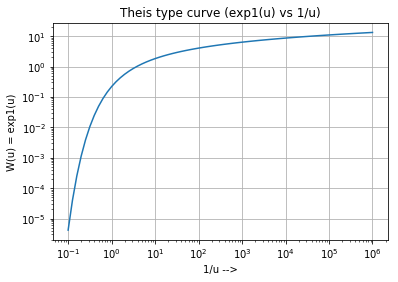

In [14]:
# Theis type curve W(u) vs 1/u

# This plots it
u = np.logspace(-6, 1, 71)  # 71 points on log scale between 10e-6 and 10

plt.plot(1/u, sp.exp1(u))

# here is the embellishement of the plot
plt.title('Theis type curve (exp1(u) vs 1/u)')
plt.xlabel('1/u -->')
plt.ylabel('W(u) = exp1(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()           # show grid lines in the plot
plt.show()           # actually show the plot on screen

To actually compute drawdowns you just use the data and the well fucntion

In [15]:
W = sp.exp1   # W is know the same as sp.exp1
kD = 500 # m2/d
S = 0.2 # [-]
Q = 1200 # m3/d
r = 50 # m
t = 1.2 # d

u0 = r**2 * S /(4 * kD * t)

s = Q/(4 * np.pi * kD) * W(u0)

print('Drawdown at r=',r, 'and t=', t, 'equals ',s ,'m.' )

print("\nAnd now a bit nicer formatted:")
print('Drawdown at r={:.0f} m and t={:.2f} d equals {:.2f} m'.format(r, t, s))


Drawdown at r= 50 and t= 1.2 equals  0.227152221703 m.

And now a bit nicer formatted:
Drawdown at r=50 m and t=1.20 d equals 0.23 m


# The flow $Q_r$ throug a ring around the well with radius r

The flow $Q_r$ can be derived by differentiation with respect to $r$:

$$ Q_r = -kD (2 \pi r) \frac {\partial s} {\partial r} $$

$$ Q_r = kD \,\, 2 \pi r \,\, \frac {Q_0} {4 \pi kD} \frac {e^{-u}} u \frac {2 r S} {4 kD t} $$

note for the last factor that

$$ \frac {2 r S} {4 kD t} = \frac 2 r \frac {r^2 S} { 4 kD t} = \frac 2 r u$$

so that

$$ \frac {Q_r} {Q_0} = \frac {kD \,\, 2 \pi r} {4 \pi kD} \frac {e^{-u}} u \frac {2 u} r $$

And finally, we have

$$ Q_r = Q_0 \, e^{-u} $$

The flow strength at this ring with radius $r$ equals

$$q_r = \frac {Q_r} {2 \pi r} = \frac {Q_0} {2 \pi r} e^{-u}$$


The simplest way to envision the flow $Q_r$ is by setting

$$ \frac {Q_r} {Q_0} = e^{-u} $$

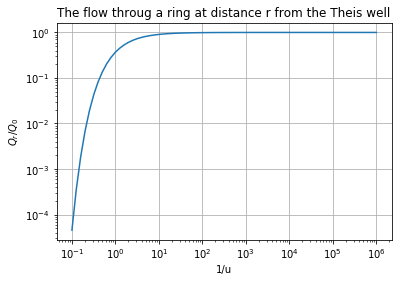

In [17]:
u = np.logspace(-6, 1, 71)
plt.plot(1/u, np.exp(-u))

plt.title("The flow throug a ring at distance r from the Theis well")
plt.xlabel('1/u')
plt.ylabel('$Q_r / Q_0$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

Remember, $1/u$ is proportional to time. So this type curve is a scaled graph of $Q_r/Q_0$ with time. It shows that initially the flow through a ring at distance $r$ is zero and that it finally approaches $Q_0$ itself. This is, the water, which all comes from storage, is coming from ever increasing distances, for the difference between $Q_0 - Q_r$ is the amount released form storage between $r=0$ and $r=r$ at a given time, will deminish with time, implying that the water is realsed from storage at an ever greater distance from the well.